In [1]:
import numpy as np
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
# Normalizing and Reshaping

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [4]:
# Ensures weights are not re-used
tf.keras.backend.clear_session()

In [5]:
# Defining the untrained model using Functional API

untrained_input_layer = tf.keras.Input(shape=(28*28,))
x_untrained = tf.keras.layers.Dense(30, activation='relu', name='dense_1')(untrained_input_layer)
x_untrained = tf.keras.layers.Dense(20, activation='relu', name='dense_2')(x_untrained)  # Intermediate layer for t-SNE
output_untrained_layer = tf.keras.layers.Dense(10, activation='softmax')(x_untrained)

untrained_mlp_model = tf.keras.Model(inputs=untrained_input_layer, outputs=output_untrained_layer)
untrained_mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')


In [6]:
untrained_intermediate_layer_model = tf.keras.Model(inputs=untrained_mlp_model.input, outputs=untrained_mlp_model.get_layer('dense_2').output)

untrained_intermediate_output = untrained_intermediate_layer_model.predict(X_test_flat)

# Apply t-SNE to the untrained model
tsne_untrained = TSNE(n_components=2, random_state=42)
untrained_tsne_results = tsne_untrained.fit_transform(untrained_intermediate_output)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


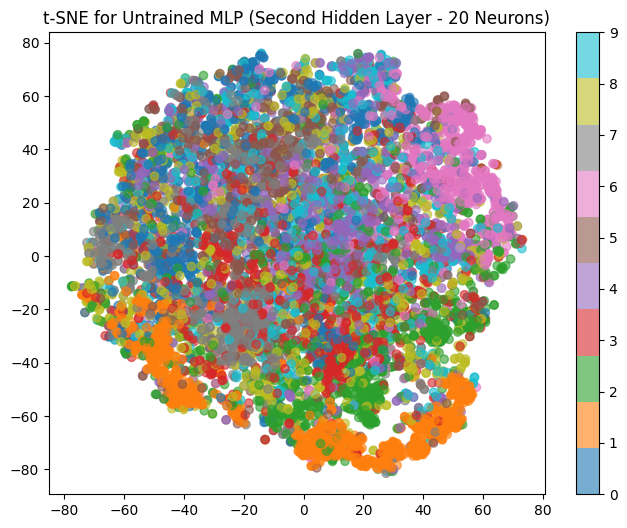

In [7]:
# Plot the t-SNE results for the untrained model
plt.figure(figsize=(8, 6))
plt.scatter(untrained_tsne_results[:, 0], untrained_tsne_results[:, 1], c=y_test, cmap='tab10', alpha=0.6)
plt.colorbar()
plt.title("t-SNE for Untrained MLP (Second Hidden Layer - 20 Neurons)")
plt.show()

In [8]:
tf.keras.backend.clear_session()

In [9]:
# Defining the MLP model using Functional API

input_layer = tf.keras.Input(shape=(28*28,))

# Hidden layers
x = tf.keras.layers.Dense(30, activation='relu', name='dense_1')(input_layer)
x = tf.keras.layers.Dense(20, activation='relu', name='dense_2')(x)  # Intermediate layer for t-SNE
output_layer = tf.keras.layers.Dense(10, activation='softmax')(x)

mlp_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
mlp_model.fit(X_train_flat, y_train, epochs=20, verbose=2)

Epoch 1/20
1875/1875 - 4s - 2ms/step - accuracy: 0.8940 - loss: 0.3674
Epoch 2/20
1875/1875 - 6s - 3ms/step - accuracy: 0.9463 - loss: 0.1812
Epoch 3/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9578 - loss: 0.1423
Epoch 4/20
1875/1875 - 3s - 1ms/step - accuracy: 0.9638 - loss: 0.1207
Epoch 5/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9678 - loss: 0.1069
Epoch 6/20
1875/1875 - 3s - 2ms/step - accuracy: 0.9705 - loss: 0.0966
Epoch 7/20
1875/1875 - 3s - 2ms/step - accuracy: 0.9725 - loss: 0.0876
Epoch 8/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9747 - loss: 0.0805
Epoch 9/20
1875/1875 - 3s - 1ms/step - accuracy: 0.9771 - loss: 0.0736
Epoch 10/20
1875/1875 - 3s - 1ms/step - accuracy: 0.9773 - loss: 0.0712
Epoch 11/20
1875/1875 - 3s - 2ms/step - accuracy: 0.9799 - loss: 0.0655
Epoch 12/20
1875/1875 - 3s - 1ms/step - accuracy: 0.9811 - loss: 0.0616
Epoch 13/20
1875/1875 - 5s - 3ms/step - accuracy: 0.9811 - loss: 0.0590
Epoch 14/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9825 - loss: 0.0563
E

In [11]:
mlp_pred = np.argmax(mlp_model.predict(X_test_flat), axis=1)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_conf_matrix = confusion_matrix(y_test, mlp_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [12]:
# Defining an intermediate layer
intermediate_layer_model = tf.keras.Model(inputs=mlp_model.input, outputs=mlp_model.get_layer('dense_2').output)

# Extracting output
trained_intermediate_output = intermediate_layer_model.predict(X_test_flat)

# Applying TSNE
tsne = TSNE(n_components=2, random_state=42)
trained_tsne_results = tsne.fit_transform(trained_intermediate_output)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


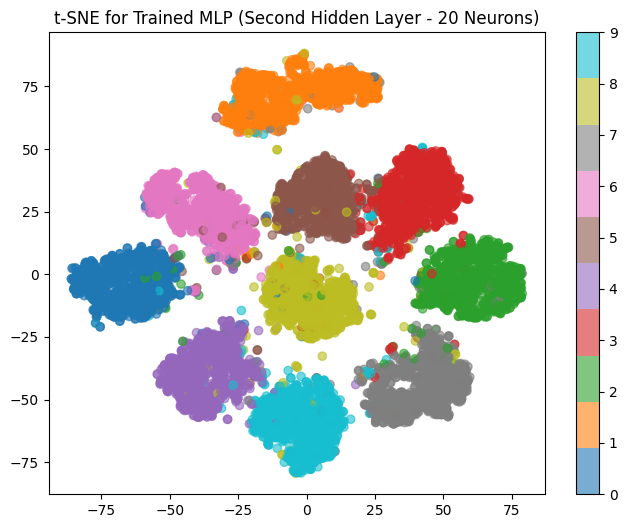

In [13]:
# Plot the t-SNE results for the trained model
plt.figure(figsize=(8, 6))
plt.scatter(trained_tsne_results[:, 0], trained_tsne_results[:, 1], c=y_test, cmap='tab10', alpha=0.6)
plt.colorbar()
plt.title("t-SNE for Trained MLP (Second Hidden Layer - 20 Neurons)")
plt.show()

#### Conclusion:
- In case of trained MLP model, the t-SNE plot shows distinct, well-separated clusters for each digit. This separation indicates that the model has learned meaningful patterns and features from the data, allowing it to group similar classes together.
- Each cluster typically represents a digit class, showing that the network can differentiate between the classes effectively.
- In the untrained MLP model, the t-SNE plot shows more overlapping or randomly scattered points without clear boundaries between the classes.
- This outcome suggests that the neurons have not learned any meaningful patterns, so the data points lack the structure necessary to separate digit classes.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [15]:
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100)

# Training
log_reg.fit(X_train_flat, y_train)
random_forest.fit(X_train_flat, y_train)

# Prediction and Accuracy of Logisitic Regression
log_reg_pred = log_reg.predict(X_test_flat)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_pred)

# Prediction and Accuracy of Random Forest
rf_pred = random_forest.predict(X_test_flat)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [16]:
import seaborn as sns

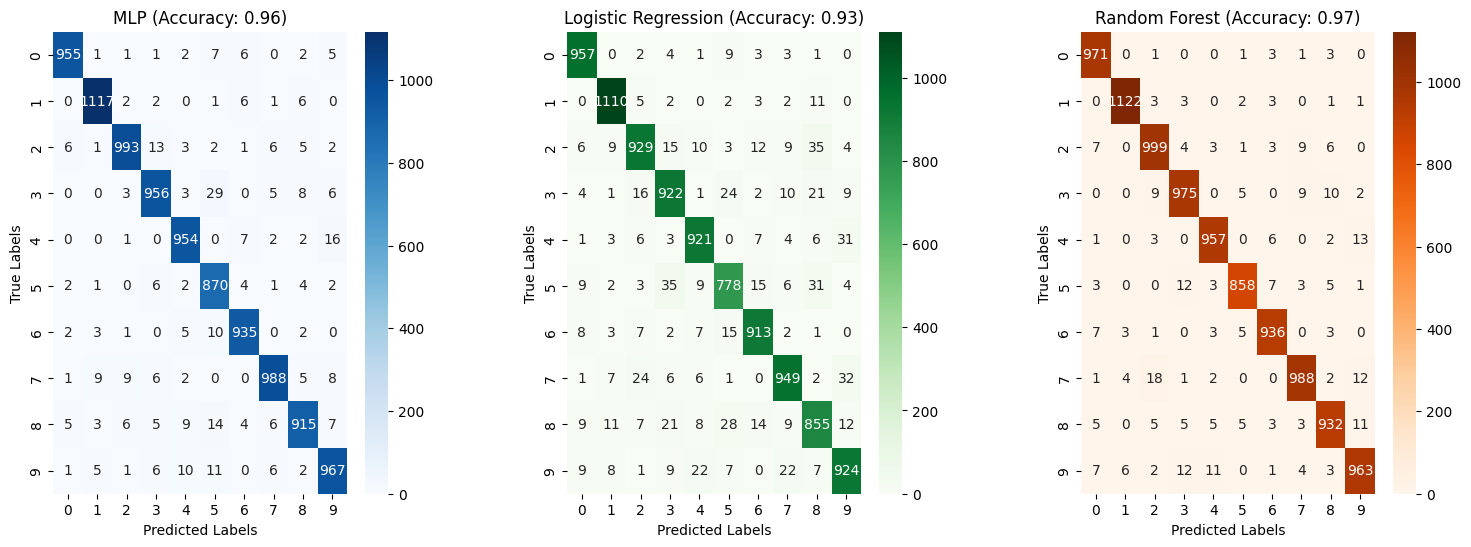

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.4)

# Confusion Matrix for Trained MLP
sns.heatmap(mlp_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title(f"MLP (Accuracy: {mlp_accuracy:.2f})")
axs[0].set_xlabel("Predicted Labels")
axs[0].set_ylabel("True Labels")

# Confusion Matrix for Logistic Regression
sns.heatmap(log_reg_conf_matrix, annot=True, fmt="d", cmap="Greens", ax=axs[1])
axs[1].set_title(f"Logistic Regression (Accuracy: {log_reg_accuracy:.2f})")
axs[1].set_xlabel("Predicted Labels")
axs[1].set_ylabel("True Labels")

# Confusion Matrix for Random Forest
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Oranges", ax=axs[2])
axs[2].set_title(f"Random Forest (Accuracy: {rf_accuracy:.2f})")
axs[2].set_xlabel("Predicted Labels")
axs[2].set_ylabel("True Labels")

plt.show()

In [18]:
mlp_f1_score = f1_score(y_test, mlp_pred, average='weighted')
print(f"F1 Score for Trained MLP Model: {mlp_f1_score:.4f}")

log_reg_f1_score = f1_score(y_test, log_reg_pred, average='weighted')
print(f"F1 Score for Logistic Regression: {log_reg_f1_score:.4f}")

random_forest_f1_score = f1_score(y_test, rf_pred, average='weighted')
print(f"F1 Score for Random Forest: {random_forest_f1_score:.4f}")

F1 Score for Trained MLP Model: 0.9650
F1 Score for Logistic Regression: 0.9256
F1 Score for Random Forest: 0.9701


#### Observations:

- Commonly confused digit pairs in MLP model: (4,9), (3,5), (2,3), (7,9)
- Commonly confused digit pairs in Logistic Regression: (2,8), (5,3), (7,9), (5,8)
- Commonly confused digit pairs in Random Forest: (7,2), (4,9), (5,3)

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [20]:
(X_fashion, y_fashion), (X_fashion_test, y_fashion_test) = fashion_mnist.load_data()

X_fashion, X_fashion_test = X_fashion / 255.0, X_fashion_test / 255.0

X_fashion_flat = X_fashion.reshape(X_fashion.shape[0], -1)
X_fashion_test_flat = X_fashion_test.reshape(X_fashion_test.shape[0], -1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


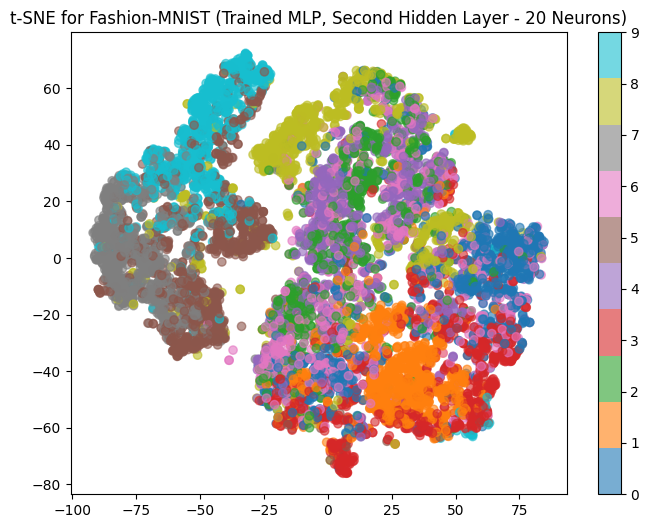

In [21]:
# Predict on Fashion-MNIST with the MNIST-trained model and extract embeddings
fashion_intermediate_output = intermediate_layer_model.predict(X_fashion_test_flat)

# Apply t-SNE to Fashion-MNIST intermediate output
fashion_tsne_results = tsne.fit_transform(fashion_intermediate_output)

# Plot t-SNE for Fashion-MNIST
plt.figure(figsize=(8, 6))
plt.scatter(fashion_tsne_results[:, 0], fashion_tsne_results[:, 1], c=y_fashion_test, cmap='tab10', alpha=0.6)
plt.colorbar()
plt.title("t-SNE for Fashion-MNIST (Trained MLP, Second Hidden Layer - 20 Neurons)")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 Score on Fashion-MNIST with MNIST-trained MLP: 0.09570019863707675


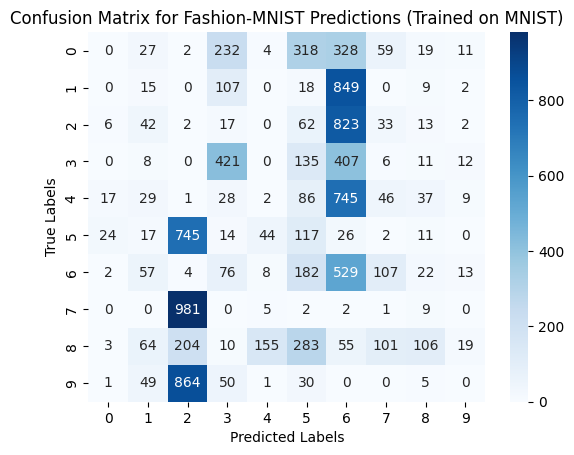

In [24]:
# Predict on Fashion-MNIST test data and calculate performance metrics
fashion_preds = np.argmax(mlp_model.predict(X_fashion_test_flat), axis=1)
f1_fashion = f1_score(y_fashion_test, fashion_preds, average='weighted')
print(f"F1 Score on Fashion-MNIST with MNIST-trained MLP: {f1_fashion}")

# Confusion Matrix for Fashion-MNIST predictions
fashion_conf_matrix = confusion_matrix(y_fashion_test, fashion_preds)
sns.heatmap(fashion_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Fashion-MNIST Predictions (Trained on MNIST)")
plt.show()

#### Observations:

- t-SNE plots shows some kind of clustering of the classes but the Confusion Matrix makes the picture clear that the predictions are terrible.
- the classes that are somewhat getting classified correctly are 3 and 6.
- majority of the samples are getting classified as 6, 5 or 2. The interpretation of such result could be that the images of clothes mostly look similar to digit 6, 5 or 2.